# Loan Prediction
   Aim :Predict the Loan Approved or not for applicant 

In [2]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Import Data
data = pd.read_csv ("Loan prediction.csv")

In [4]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## EDA

In [5]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
#Finding duplicate rows
data[data.duplicated()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [8]:
#Replacing value
data['Dependents'] = data['Dependents'].replace('3+','3')

In [9]:
#Check Null Values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
#Fill null values with mode
data['Gender'].fillna(data['Gender'].mode()[0],inplace = True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace = True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace = True)
data['Married'].fillna(data['Married'].mode()[0],inplace = True)
data['LoanAmount'].fillna(data['LoanAmount'].mode()[0],inplace = True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace = True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace = True)

In [11]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
#Checking count of each categorical column
cat =['Gender','Married','Dependents','Education', 'Self_Employed','Credit_History','Property_Area']
print("Value count:\n")
for col in cat:
    print(col,"\n",data[col].value_counts(),"\n") 

Value count:

Gender 
 Male      502
Female    112
Name: Gender, dtype: int64 

Married 
 Yes    401
No     213
Name: Married, dtype: int64 

Dependents 
 0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64 

Education 
 Graduate        480
Not Graduate    134
Name: Education, dtype: int64 

Self_Employed 
 No     532
Yes     82
Name: Self_Employed, dtype: int64 

Credit_History 
 1.0    525
0.0     89
Name: Credit_History, dtype: int64 

Property_Area 
 Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64 



## Visualization

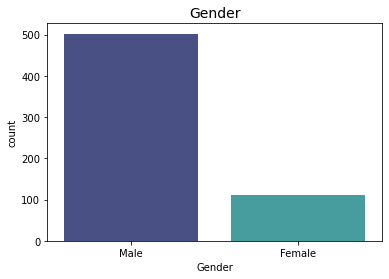

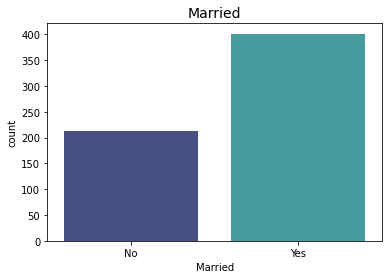

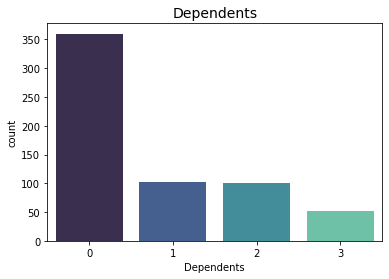

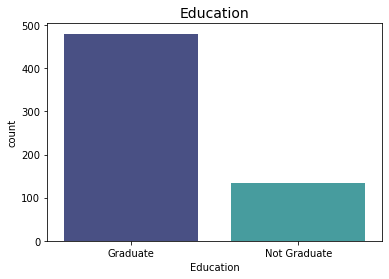

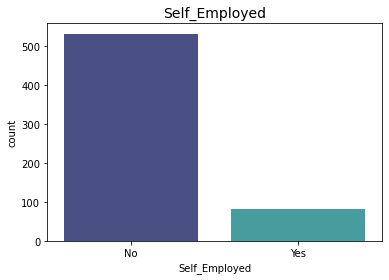

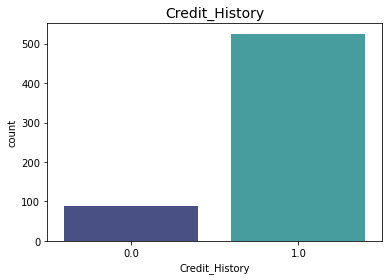

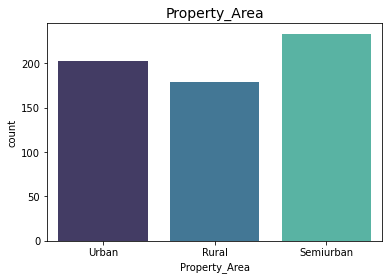

In [14]:
for col in cat[0:]:
    sns.countplot(x=col , data=data ,palette='mako')
    plt.title(col, fontsize=14)
    plt.show();

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

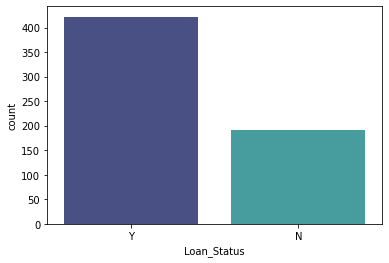

In [15]:
sns.countplot(x=data['Loan_Status'] , data=data ,palette='mako')

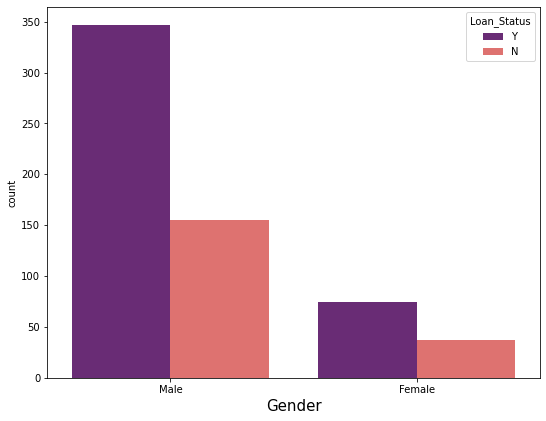

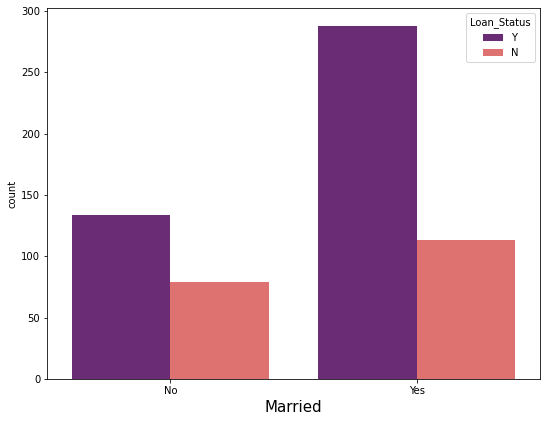

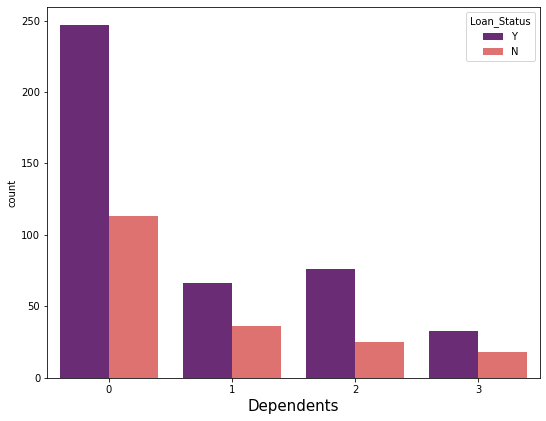

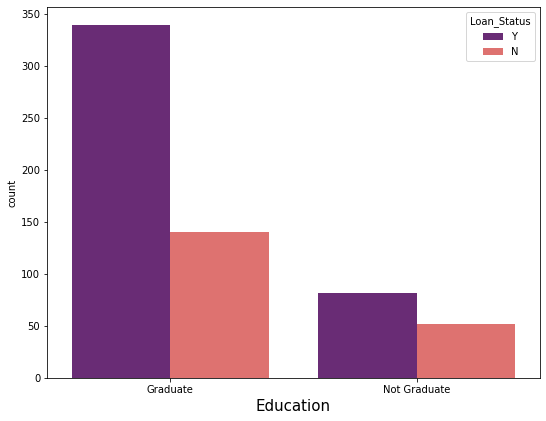

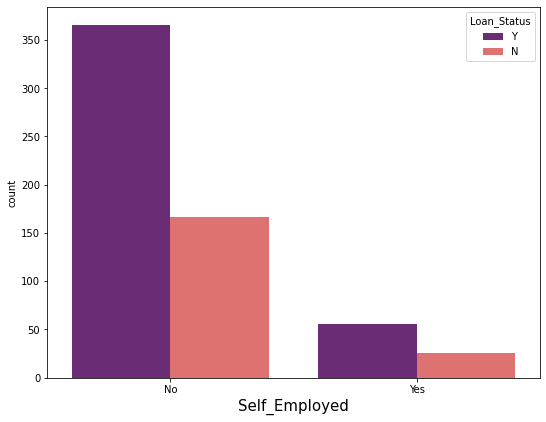

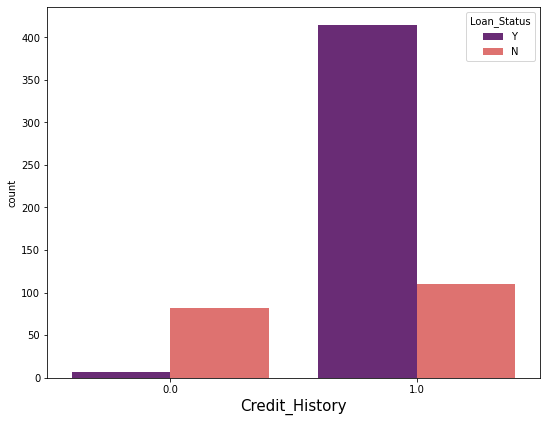

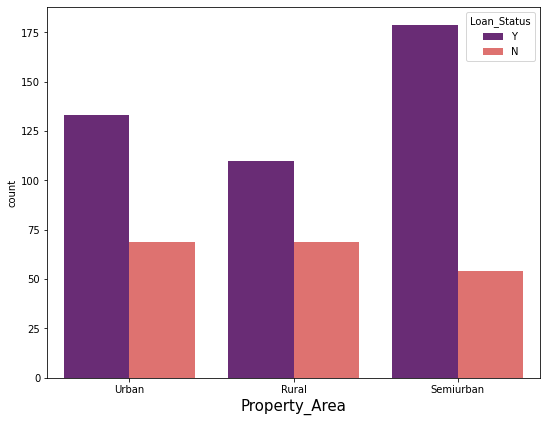

In [16]:
#checking relation between categorical column and Loan_Status col
for col in cat[0:]: 
    plt.figure(figsize=(30,15))
    plt.subplot(2,3,1)
    sns.countplot(x=col ,hue='Loan_Status', data=data ,palette='magma')
    plt.xlabel(col, fontsize=15)

In [17]:
#For check skewness of Applicant income add two different income column
data['Totalincome'] = data['ApplicantIncome'] + data ['CoapplicantIncome']

In [18]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Totalincome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0


# Outliear Detection

Text(0.5, 1.0, 'Loan_Amount_Term')

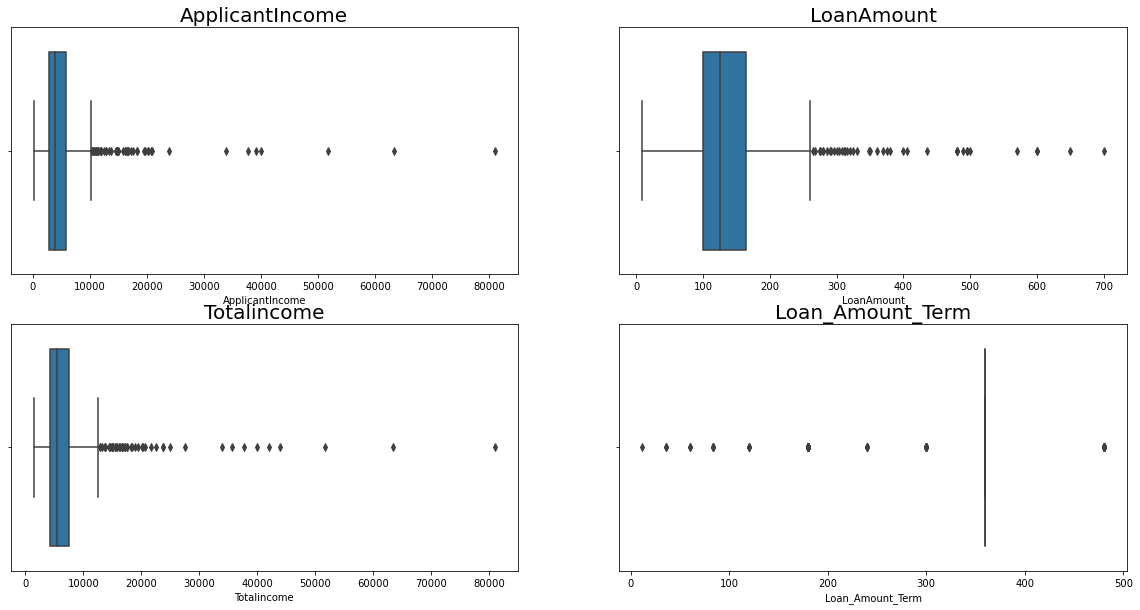

In [19]:
# Create a boxplot for each variable to check the distribution of data
plt.figure(figsize=(20,10))
# create a box plot
plt.subplot(2,2,1)
sns.boxplot(x='ApplicantIncome',data=data)
plt.title('ApplicantIncome',fontsize=20)

plt.subplot(2,2,2)
sns.boxplot(x='LoanAmount',data=data)
plt.title('LoanAmount',fontsize=20)

plt.subplot(2,2,3)
sns.boxplot(x='Totalincome',data=data)
plt.title('Totalincome',fontsize=20)


plt.subplot(2,2,4)
sns.boxplot(x='Loan_Amount_Term',data=data)
plt.title('Loan_Amount_Term',fontsize=20)

    
    
    

Text(0.5, 1.0, 'Loan_Amount_Term')

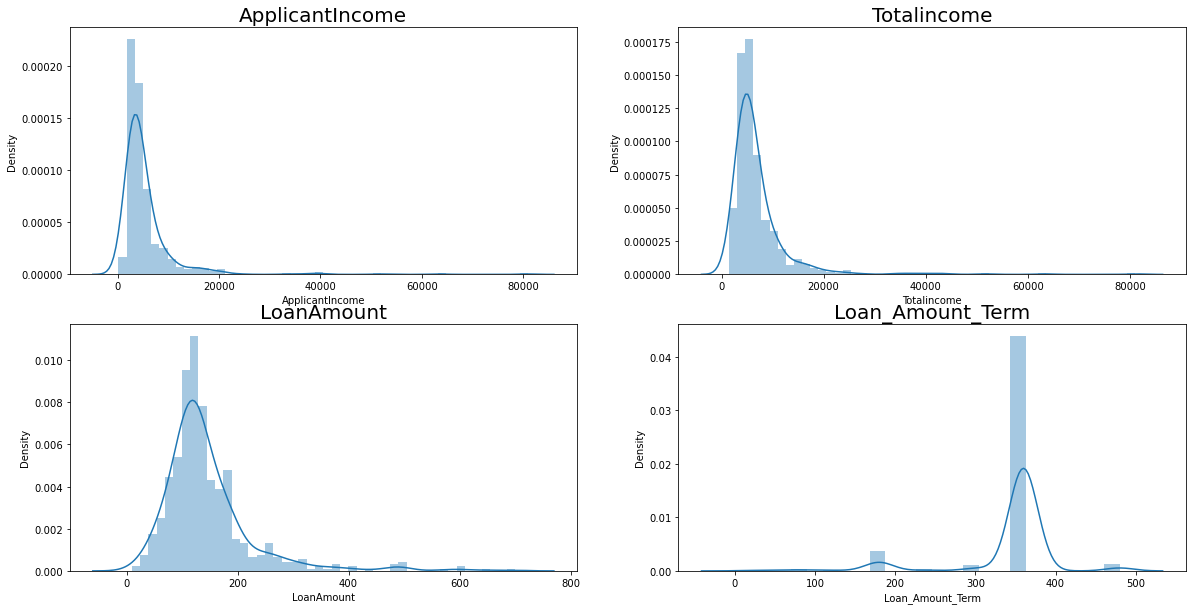

In [20]:
# Create a boxplot for each variable to check the distribution of data
# Create a boxplot for each variable to check the distribution of data
plt.figure(figsize=(20,10))
# create a box plot
plt.subplot(2,2,1)
sns.distplot(data['ApplicantIncome'])
plt.title('ApplicantIncome',fontsize=20)

plt.subplot(2,2,2)
sns.distplot(data['Totalincome'])
plt.title("Totalincome",fontsize=20)



plt.subplot(2,2,3)
sns.distplot(data['LoanAmount'])
plt.title('LoanAmount',fontsize=20)

plt.subplot(2,2,4)
sns.distplot(data['Loan_Amount_Term'])
plt.title('Loan_Amount_Term',fontsize=20)


In [21]:
data['ApplicantIncome'] = np.log(data['ApplicantIncome'])
data['Totalincome'] = np.log(data['Totalincome'])
data['LoanAmount'] = np.log(data['LoanAmount'])
data['Loan_Amount_Term'] = np.log(data['Loan_Amount_Term'])

Text(0.5, 1.0, 'Loan_Amount_Term')

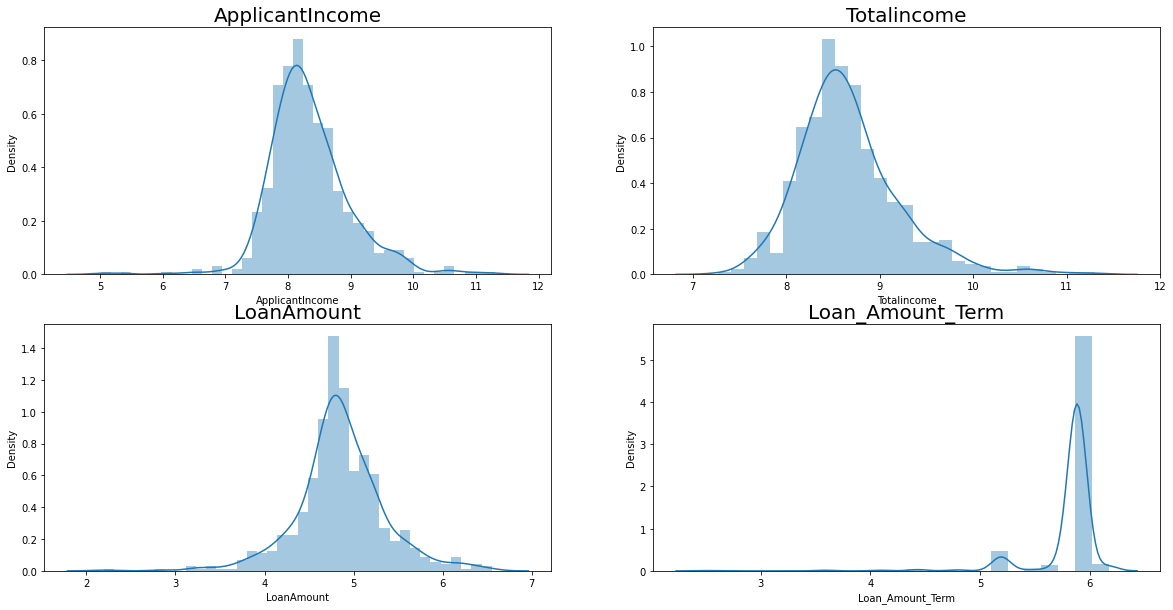

In [22]:
# Create a boxplot for each variabl
e to check the distribution of data
plt.figure(figsize=(20,10))
# create a box plot
plt.subplot(2,2,1)
sns.distplot(data['ApplicantIncome'])
plt.title('ApplicantIncome',fontsize=20)

plt.subplot(2,2,2)
sns.distplot(data['Totalincome'])
plt.title("Totalincome",fontsize=20)



plt.subplot(2,2,3)
sns.distplot(data['LoanAmount'])
plt.title('LoanAmount',fontsize=20)


plt.subplot(2,2,4)
sns.distplot(data['Loan_Amount_Term'])
plt.title('Loan_Amount_Term',fontsize=20)


####  Heatmap

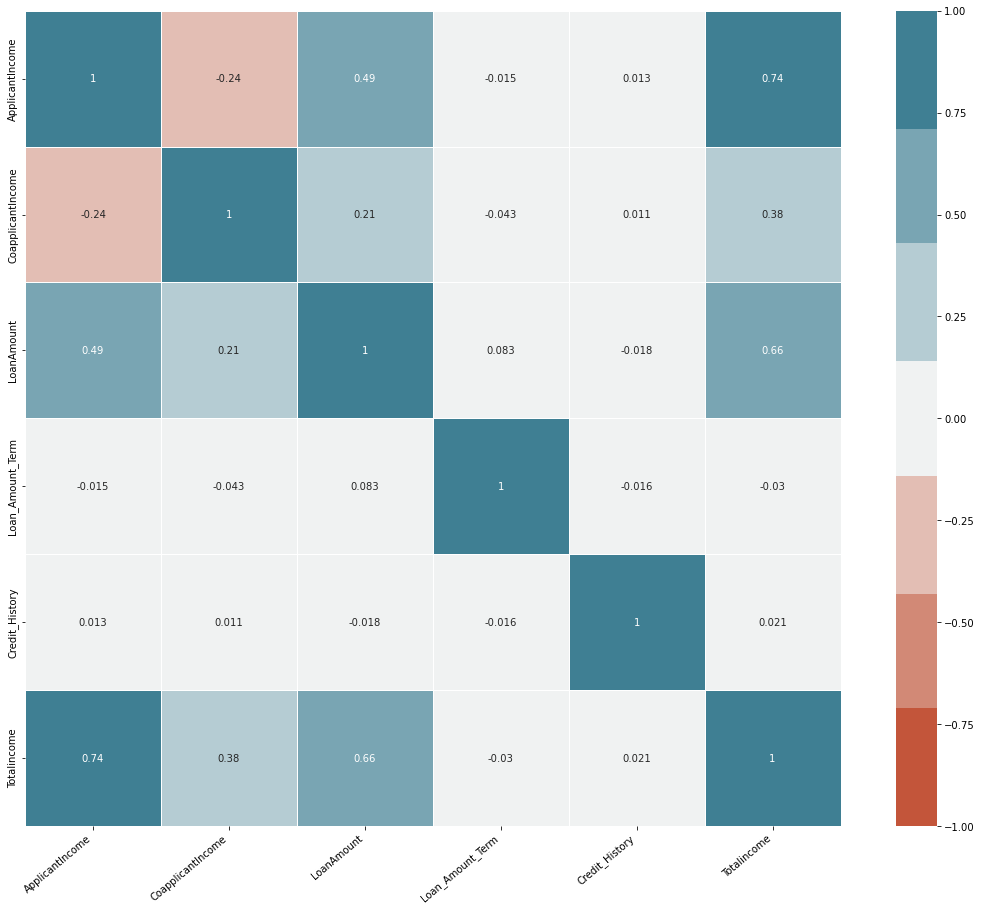

In [23]:
corr = data.corr()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(
    
    corr, 
    vmin=-1, vmax=1, center=0, annot=True,
    cmap=sns.diverging_palette(20, 220, n=7),
    square=True,
    linewidths=.5,

)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=40,
    horizontalalignment='right'
    
);

##### Dropping column AppicationIncome CoapplicationIncome LoanAmount and Totalincome Cause its highly correlated each other

In [25]:
data.drop(columns=['ApplicantIncome','CoapplicantIncome','LoanAmount','Totalincome','Loan_ID'],inplace= True)

In [26]:
data

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5.886104,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,5.886104,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,5.886104,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,5.886104,1.0,Urban,Y
4,Male,No,0,Graduate,No,5.886104,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,5.886104,1.0,Rural,Y
610,Male,Yes,3,Graduate,No,5.192957,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,5.886104,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,5.886104,1.0,Urban,Y


## Label Encoding

In [27]:
from sklearn import preprocessing
col2 = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
#encode data
label_encoder = preprocessing.LabelEncoder()
for col in col2:
    data[col] =  label_encoder.fit_transform(data[col]) 

In [28]:
data

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5.886104,1.0,2,1
1,1,1,1,0,0,5.886104,1.0,0,0
2,1,1,0,0,1,5.886104,1.0,2,1
3,1,1,0,1,0,5.886104,1.0,2,1
4,1,0,0,0,0,5.886104,1.0,2,1
...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,5.886104,1.0,0,1
610,1,1,3,0,0,5.192957,1.0,0,1
611,1,1,1,0,0,5.886104,1.0,2,1
612,1,1,2,0,0,5.886104,1.0,2,1


## Train-Test Split

In [29]:
x=data.iloc[:,0:8]
y=data['Loan_Status']  

In [30]:
x

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5.886104,1.0,2
1,1,1,1,0,0,5.886104,1.0,0
2,1,1,0,0,1,5.886104,1.0,2
3,1,1,0,1,0,5.886104,1.0,2
4,1,0,0,0,0,5.886104,1.0,2
...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,5.886104,1.0,0
610,1,1,3,0,0,5.192957,1.0,0
611,1,1,1,0,0,5.886104,1.0,2
612,1,1,2,0,0,5.886104,1.0,2


In [31]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [33]:
x_train

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area
333,1,1,0,0,0,5.192957,1.0,2
114,1,0,0,0,0,5.886104,1.0,1
281,1,1,0,0,0,5.886104,1.0,1
538,1,1,0,1,0,5.886104,1.0,0
402,1,0,0,0,0,5.886104,1.0,1
...,...,...,...,...,...,...,...,...
440,1,0,0,0,0,5.886104,1.0,1
165,1,1,0,0,0,5.886104,1.0,0
7,1,1,3,0,0,5.886104,0.0,1
219,0,1,2,0,0,5.886104,1.0,1


In [34]:
x_test

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area
439,0,1,0,1,1,5.886104,1.0,0
348,1,1,0,0,0,5.886104,1.0,1
459,1,1,0,0,0,5.886104,1.0,1
71,1,1,2,1,1,5.886104,1.0,1
51,0,0,0,0,0,5.886104,1.0,1
...,...,...,...,...,...,...,...,...
200,1,1,1,1,0,5.886104,1.0,1
192,1,1,0,1,0,5.886104,1.0,2
159,1,1,0,0,0,5.886104,1.0,1
372,1,1,2,0,1,5.703782,1.0,0


## Model Buliding

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB as gb
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import tree #plot tree
from sklearn.metrics import classification_report#,accuracy_score,r2_score

## Logistic Regression

In [36]:
#Logistic regression and fit the model
classifier_lr = LogisticRegression(random_state=42)
classifier_lr.fit(x_train,y_train)
#Predict for X dataset
y_pred_lr = classifier_lr.predict(x_test)
y_pred_lr

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1])

In [37]:
# Confusion Matrix for the model accuracy
confusion_matrix_lr = confusion_matrix(y_test, y_pred_lr)
confusion_matrix_lr

array([[12, 19],
       [ 1, 91]], dtype=int64)

In [38]:
print(accuracy_score(y_test, y_pred_lr))

0.8373983739837398


## Decision Tree

In [71]:
dt = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [72]:
#Predicting on test data
y_pred_dt = dt.predict(x_test)
y_pred_dt

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1])

In [73]:
accuracy_score(y_test, y_pred_dt)

0.8373983739837398

## Random Forest

In [42]:
from sklearn.model_selection import KFold
kfold=KFold(n_splits=5,random_state=72,shuffle=True)

In [43]:
rf =RandomForestClassifier(n_estimators=100,max_features =3)
results_rf =cross_val_score(rf,x,y,cv=kfold)
results_rf

array([0.79674797, 0.7804878 , 0.81300813, 0.78861789, 0.76229508])

In [74]:
#Accuracy
print(np.mean(results_rf))

0.7882313741170198


## Bagging

In [75]:
bag_c=BaggingClassifier()
bag1 =bag_c.fit(x_train,y_train)
bag1.score(x_train,y_train)

0.8513238289205702

In [76]:
bag1.score(x_test,y_test)

0.8048780487804879

#### Bagging  for D.T classifier use kfold split

In [77]:
model_bag = BaggingClassifier(n_estimators=50, random_state=7)
result_bag = cross_val_score(model_bag, x, y, cv=kfold)
result_bag

array([0.79674797, 0.74796748, 0.79674797, 0.78861789, 0.76229508])

In [78]:
#Accuracy
print(result_bag.mean())

0.7784752765560442


## SVM

In [79]:
model_linear = SVC(kernel = "poly")
model_linear.fit(x_train,y_train)
y_pred_svm = model_linear.predict(x_test)
y_pred_svm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1])

In [80]:
np.mean(y_pred_svm)

0.8943089430894309

##### BaggingClassifier gives Best Accuracy Evaluate data with this model

## Model Evaluation

In [81]:
pred = np.array([1,1,0,0,0,5.886104,0.0,0])
pred = pred.reshape(1,-1)

if bag1.predict(pred) == 1:
    print("Loan approved")
else:
        print("Not Loan Approved")


Not Loan Approved


### Pickel file

In [82]:
##Import Pickel

In [83]:
!pip install pickle-mixin

In [85]:
import pickle

In [92]:
filename = 'final_Bagging_model.pkl'
pickle.dump(bag_c, open(filename,'wb'))

In [93]:
pickled_model=pickle.load(open('final_Bagging_model.pkl','rb'))

In [94]:
pickled_model.fit(x,y)
pk=pickled_model.predict(x_test)
pk

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1])